<a href="https://colab.research.google.com/github/juliolynn/MNA_Advanced_ML_Methods_Group33/blob/main/Week%202/Activity%201b/A1b_DL_TC5033_AD2023_Julio_Lynn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
# import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


In [ ]:
DATA_PATH = './asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Import Images

In [ ]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
# Changed from np.float32 in the example to 64-bit precision floating-point number
x_train = train_df.values.astype(np.float64)
x_val = valid_df.values.astype(np.float64)

In [ ]:
x_val_copy = x_val.copy()
y_val_copy = y_val.copy()

In [ ]:
x_val.shape

(7172, 784)

In [ ]:

def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Create a function that will allow you to split the previously loaded validation set
    into valition and test.
    '''
    rows, cols = x.shape

    if shuffle:
        idxs = np.arange(rows)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]


    val_pct = int(pct * rows)
    test_pct = int((1-pct) * rows)

    x_val = x[val_pct:].reshape(val_pct, -1).astype(float)
    y_val = y[val_pct:].reshape(val_pct, 1)

    x_test = x[:test_pct].reshape(test_pct, -1).astype(float)
    y_test = y[:test_pct].reshape(test_pct, 1)

    return x_val, y_val, x_test, y_test

In [ ]:
x_val, y_val, x_test, y_test = split_val_test(x_val_copy, y_val_copy)

In [ ]:
### The following list will hold the alphabet where each class numer from `y` represents a letter.

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalize

In [ ]:
# Function to apply normalization using the Standard Score
def normalize(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [ ]:
x_mean = x_train.mean()
x_std = x_train.std()

x_test_copy = x_test.copy()

x_train = normalize(x_mean, x_std, x_train)
x_val = normalize(x_mean, x_std, x_val)
x_test = normalize(x_mean, x_std, x_test)

### Plot samples

In [ ]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

The sampled image represents the letter: p


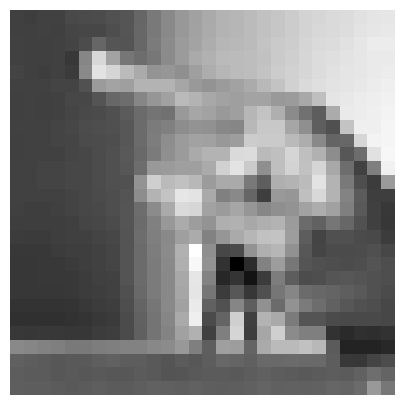

In [ ]:
rnd_idx = np.random.randint(len(y_test))
print(f'The sampled image represents the letter: {alphabet[y_test[rnd_idx, 0]]}')


sample = x_test_copy[rnd_idx].reshape(28, 28)
plot_number(sample)

### Equations for our model


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Helper functions

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Custom implementation of Linear, ReLU and Sequential classes

In [ ]:
class np_tensor(np.ndarray): pass

###  Linear class

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # esta el foward de la clase lineal
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### ReLU class

In [ ]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Sequential class

In [ ]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

In [ ]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    exp_scores_sum = exp_scores.sum(axis = 0)
    probs = exp_scores / exp_scores_sum
    preds = probs.copy()
    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

### Training Loop

In [ ]:
def accuracy(model, x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

In [ ]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        mini_batches = create_minibatches(mb_size, x_train, y_train)
        for i, (x, y) in enumerate(mini_batches):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        print(f'epoch: {epoch}, costo: {cost}, accuracy: {accuracy(model, x_val, y_val, mb_size)}')

### Create your model and train it

In [ ]:
model = Sequential_layers([Linear(784, 384), ReLU(), Linear(384, 384), ReLU(), Linear(384, 192), ReLU(), Linear(192, len(alphabet))])
mb_size = 512
learning_rate = 1e-4
epochs = 20

In [ ]:
mb_size = 256
learning_rate = 1e-3
epochs = 20

train(model, epochs, mb_size, learning_rate)

epoch: 0, costo: 0.030173221246644195, accuracy: 0.7902955939765756
epoch: 1, costo: 0.0074803539372997555, accuracy: 0.7939208031232571
epoch: 2, costo: 0.004602564619922066, accuracy: 0.7950362520914668
epoch: 3, costo: 0.003076934148148109, accuracy: 0.7947573898494144
epoch: 4, costo: 0.0019990366797079406, accuracy: 0.7939208031232571
epoch: 5, costo: 0.0018853275356149307, accuracy: 0.8011712214166202
epoch: 6, costo: 0.0013721143264490646, accuracy: 0.8022866703848299
epoch: 7, costo: 0.0009412405598165836, accuracy: 0.8039598438371445
epoch: 8, costo: 0.0010317036853155564, accuracy: 0.8061907417735639
epoch: 9, costo: 0.0005932429532394868, accuracy: 0.805633017289459
epoch: 10, costo: 0.0009186045382115442, accuracy: 0.8059118795315114
epoch: 11, costo: 0.0006495700275561849, accuracy: 0.805633017289459
epoch: 12, costo: 0.00031694033379955726, accuracy: 0.8067484662576687
epoch: 13, costo: 0.0003624442392709264, accuracy: 0.8078639152258784
epoch: 14, costo: 0.00043493918069

### Test your model on Random data from your test set

In [ ]:
y_test.shape

(3586, 1)

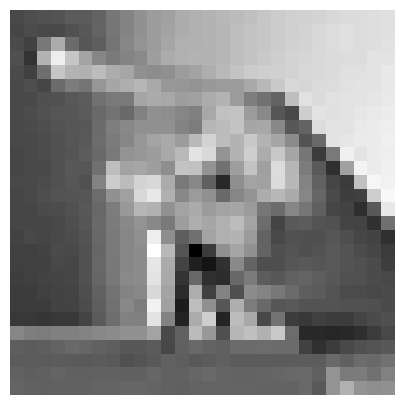

el valor predicho es: p el valor real es:p


In [ ]:
idx = np.random.randint(len(y_test))
plot_number(x_test_copy[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'predicted value is: {alphabet[pred]}; real value is: {alphabet[y_test[idx][0]]}')

test of colab and github integration